<a/ id='top'></a>

# CSCI4022 Homework 4; GMMs

## Due Monday, March 13 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import math

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Theory: GMM; 5 pts) 
In the GMM slides, we stated that the weights $w_m$ of the 1-dimensional GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

Within the GMM function, $\phi(x|\mu_n, \sigma_n^2)$  represents a probability distance function that returns the likelihood of a value occurring given a mean and variance. A GMM is a balance between multiple PDFs that return a likelihood. These must sum to 1 in order to correctly balance the PDFS.

If the weights sum to greater than 1 than the returned "probability" could be greater than 1.0 which is clearly invalid.

$f(x|\theta)=0.5\phi(x|\mu_1, \sigma_1^2)+0.75\phi(x|\mu_2, \sigma_2^2)+\dots+ 0.3\phi(x|\mu_m, \sigma_m^2)$

$f(x|\theta)=0.33 + 0.56 + 0.12 =  1.01$

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

It is possible for a valid pdf to have negative weights. However, $\sum w_k$ must still equal 0. Difficulties associated with negative weights might be that other weights would have to make up for the negative weight making other graphs weighted higher.

***

<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Choose a k? 25 pts)

Continuing with the Pokémon theme of HW3's clustering, we have a data set of geolocated Pokémon Go "spawns" taken from the bay area around San Francisco, CA, US.  What results is a map that should loosely approximate the population density of the San Francisco Bay, with some adjustments according to the weights that Pokémon Go uses (I believe this means more things happen in parks, for example), and some bias due to using cell phone usage as a measure for population location.  The set includes:


`lat`: numeric,	Latitude of spawn

`lng`:	numeric,	Longitude

`name`: which Pokémon spawned at each location (you may discard this if desired).

For all prompts, use Euclidean distance ($L_2$).

(**NB**: using Euclidean distance on lat/lon data is not technically correct, you classically have to *project* locations onto a 2D map or find their true great-circle distances apart.  We will ignore this here, as the region is small enough to have only minor error due to ignoring curvature of the surface.)

Here we will focus on the locational problem of latitude versus longitude.  As in kmeans, instead of choosing $k$ we might choose a variety of values of $k$ and implement a GMM for each.

Shown below is the lat/lon locations of the Pokémon.  Not only is there structure, it has a shape: some data appears in lines that aren't perfect circles.  This is a perfect task for the GMM!

         lat         lng     name
0  37.361151 -122.014794   Cubone
1  37.835080 -122.477904  Spearow
2  37.322755 -121.976948  Rattata


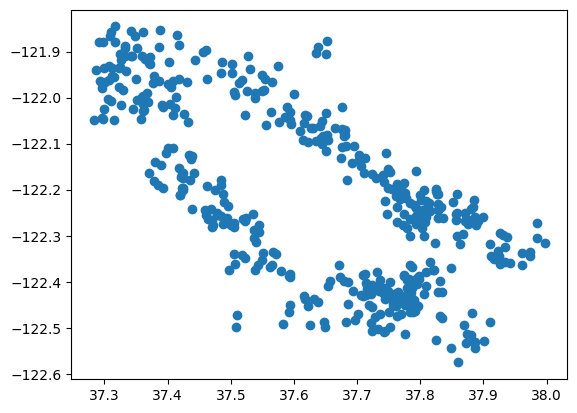

In [2]:
df=pd.read_csv('../data/bayareapokemon.csv'', encoding='UTF-8')
print(df.head(3))
plt.scatter(df['lat'], df['lng'])
df=df.drop(columns='name')

**Part A**:  Write (by hand) a function `GMM(dat, k, init=...)` that performs the EM algorithm for a Gaussian mixture model on a given set of $(X,Y)$ locational data.  You may include random initialization inside the function or as an input.

You should run the algorithm for sufficient steps until convergence, and should return at a minimum, the means, 2x2 covariance matrices, and mixture probabilities of each component.  You may also want to return the responsibilities of each datum to the k components for later use, but this is less necessary.

In [3]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))
#             means[dim][0] = np.sum(p_mi[:][dim] * data[:][0]) / N_classk[dim] # hmmmmmmm????
# #             print(means[dim][0])
#             means[dim][1] = np.sum(p_mi[:][dim] * data[:][1]) / N_classk[dim]

In [4]:
# I used a lot of code from nb 5 and 6 and also the starter code provided!
def GMM(dat, k):
    
    #Comments will reference slides 26-31 from Feb 9
    
    """Define the variables we will use in the Algorithm"""
    #This represents Σ_m (covariance matrix of each component) (slide 26)
    covars=np.zeros((k,2,2))
    
    #This represents μ_m (mean values of each component) (slide 26)
    means=np.zeros((k,2))
    
    #This represents W_m (weights/likelihood of each component) (slide 26 bottom)
    p_class=np.zeros(k)
    
    #This represents P(x_i | cluster = m), or Φ(x_i | μ_m, Σ_m) (slide 27)
    #During the Expectation step, we will use this to derive p̂_mi (or p_class_given_data) as shown on slide 27
    #p_class_given_data will be the same shape
    p_data_given_class=np.zeros((len(dat),k))
    p_mi=np.zeros((len(dat),k))
#     print(p_mi[0] for row in pmi) #delete
    
    """Initialize means, covs, p_classes"""
    #initializations of starting points (used to set the initial means below)
    init_idx=np.random.choice(range(len(dat)), size=k, replace=False)
    
    #Initialize the covariance matrix, the means, and the p_class for each of k components (dims)
    for dim in range(k):
        #Set the cov matrix of each component to the cov of the entire dataset (slide 26)
        covars[dim,:,:]=np.cov(np.transpose(dat))

        #Set initial means to initial chosen data points (slide 26)
        means[dim,:]=dat.iloc[init_idx[dim]]
        
        #Give each component equal weighting / likelihood to start (slide 26)
        p_class[dim]=1/k
        
    """Now Iterate"""
    #Now we start our for loop, where-in we'll alernate between: (1) Expecation Step and (2) Maximization Step
    #Note - 50 steps is fine, no requirement to check for convergence on this HW
    lat = df['lat'].tolist()
    lng = df['lng'].tolist()
    dat = list(zip(lat, lng))
#     print(np.array(lat))
    data = np.concatenate([np.array(dat)])
#     print(dat)
   
#     covars[0] = [[1,-.9],[-.9,1]]
#     print("p_data_given_class:", p_data_given_class)
#     print("COVARS:", covars)
#     print("MEANS:", means)
#     print(data)
    for step in range(50):  
        """Expectation Step (Slide 27)"""
        for n in range(len(dat)):
            for p in range(k):
                p_data_given_class[n][p] =stats.multivariate_normal.pdf(x=dat[n], mean=means[p], cov=covars[p])
        #weighted prob
        for x in range(len(dat)):
            for u in range(k):
                p_mi[x][u] = p_data_given_class[x][u] * p_class[u]            
        #normalized
        for z in range(len(dat)):            
            summ = np.sum(p_mi[z][:])
            for j in range(k):
                p_mi[z][j] = p_mi[z][j] / summ
        
        """Maximization Step (Slide 29-30)"""
        N_classk = []
        for o in range(k):
            nc = 0
            for v in range(len(dat)):
                nc += np.sum(p_mi[v][o])
            N_classk.append(nc)
        for dim in range(k):
            p_class[dim] = (N_classk[dim])/len(dat)
            means[dim][0]=0
            means[dim][1]=0
            for h in range(len(dat)):
                means[dim][0] += p_mi[h][dim] * data[h][0]
                means[dim][1] += p_mi[h][dim] * data[h][1]
            means[dim][0] = means[dim][0] / N_classk[dim]
            means[dim][1] = means[dim][1] / N_classk[dim]
        for dim in range(k):
            covars[dim] = np.sum(np.outer(data[i,:]-means[dim],data[i,:]-means[dim]) for i in range(len(data)))/(len(data)-1)

    """Once we're done with our for loop, we compute the mean dist (This formula is given in the HW below in Part B)"""
    num = 0
    for i in range(len(dat)):
        for m in range(k):
            num += p_mi[i][m]*distance(dat[i][:], means[m])**2
    mean_dist = (num)**0.5/len(data)
#     print([p_mi, means, covars, p_class, mean_dist])
    return [p_mi, means, covars, p_class, mean_dist]

**Part B**: 

Run your algorithm for $k=[1,2,3,4,5,6,7,8]$, then create an **elbow plot** of the weighted-mean-distance to component for each choice of $k$.

To compute this, take a clustering and its responsibilities $p_{mi}$, then compute the average distance between each point and each cluster, weighted by $p_{mi}$:

$$ \bar{D} = \sqrt{\frac{\sum^n_{i=1}\sum^k_{m=1} p_{mi} (x_i-\mu_m)^2}{n}}$$

(**Idea**: this averages the distance between each point and the 'closest' cluster, but allows for the soft-clustering nature of points to compute distances between multiple clusters.)


Create your elbow plot by making a line plot of the values of $\bar{D}$ against $k$.

C:\Users\Jack Higgins\AppData\Local\Temp\ipykernel_25812\2475324923.py:85: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  covars[dim] = np.sum(np.outer(data[i,:]-means[dim],data[i,:]-means[dim]) for i in range(len(data)))/(len(data)-1)


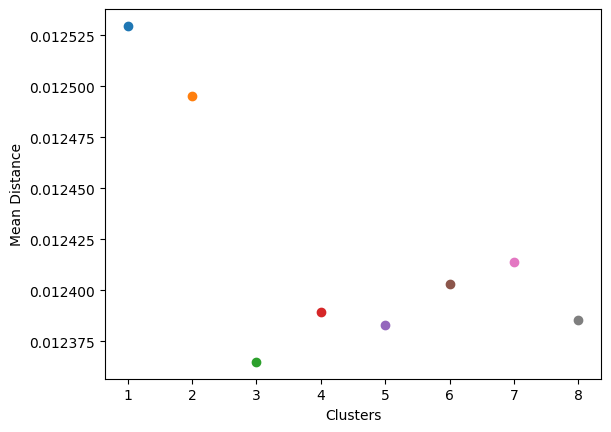

In [5]:
# GMM(df,2)

k_arr=[1,2,3,4,5,6,7,8]
lat = df['lat'].tolist()
lng = df['lng'].tolist()
dat = list(zip(lat, lng))
gmms = []

for x in k_arr:
    pmi, means, covars, p_class, mean_dist = GMM(df,x)
    gmms.append([pmi, means, covars, p_class, mean_dist])
    plt.scatter(x, mean_dist)
plt.xlabel("Clusters")
plt.xticks([1,2,3,4,5,6,7,8])
plt.ylabel("Mean Distance")
plt.show()
# print(arr)

**Part C**: 

Based on the plot in part **B**, what looks like the best choice of $k$ for this problem?  Are multiple values in contention?  Explain, and then plot your preferred choice of $k$ where you color each data point according to the cluster with which it has the highest responsibility (i.e. hard cluster based on responsibilities).

C:\Users\Jack Higgins\AppData\Local\Temp\ipykernel_25812\2475324923.py:85: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  covars[dim] = np.sum(np.outer(data[i,:]-means[dim],data[i,:]-means[dim]) for i in range(len(data)))/(len(data)-1)


[[], [], []]


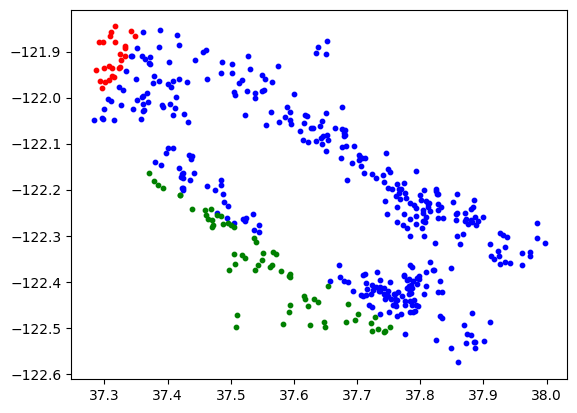

In [6]:
color=["red","blue","green","orange","black","purple","brown","yellow"]

clusters_x = []
clusters_y = []
k=3
[pmi, means, covars, p_class, mean_dist] = GMM(df,k)

for n in range(k):
    clusters_x.append([])
    clusters_y.append([])
print(clusters_x)
for i in range(len(dat)):
    clusters_x[np.nanargmax(pmi[i])].append(dat[i][0])
    clusters_y[np.nanargmax(pmi[i])].append(dat[i][1])
for j in range(k):
    plt.scatter(clusters_x[j], clusters_y[j], c =color[j], s = 10)

It appears $k=3$ is the bend of the elbow so I chose that as my number of clusters for this problem. There is big jumps in mean distance from $k=1$ to $k=2$ and another from $k=2$ to $k=3$ but after that there is little to be gained from increasing the number of clusters. The shape of the graph isn't what I expected, I thought the graph would be shaped similar to a $f(x) = 1/x$ graph. When looking at the graphs created, only 3 clusters are ever dominant in the graph.

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (Simulation on the GMM; 15 pts)


Because the GMM is a *generative* model, we could use our results from Problem 2 to not only score models based on their mean-distance-to-centroid (or other statistical measures like AIC, BIC), we could simulate points from the models and visually ascertain whether or not they appear similar to the original distribution.

**Part A**: 

For each of the GMM models in Problem 2 from $k=[2,3,4,5,6,7,8]$, simulate 1000 points from your estimated density function (recall: this is a two-part simulation of choosing a component **then** drawing from the normal of appropriate mean/covariance).

Create a figure with 2 columns and 4 rows holding all 8 data sets: the 7 simulated ones and the original data shown above.  Label each plot appropriately.  

In [7]:
#stats.multivariate_normal.pdf(x=dat[n], mean=means[p], cov=covars[p])
# directly took this from nb05 but modified it for the shape of the data
def gmm_samples(num_samples, means, covars, p_class):
    samples = []
    cs = []
    for i in range(len(p_class)):
        cs.append(i)
    for i in range(num_samples):
        delta = np.random.choice(cs, p=p_class) # choosing component
        samples.append((stats.multivariate_normal.rvs(mean=means[delta], cov=covars[delta]))) #drawing from normal
    return samples

Text(0.5, 1.0, 'Original data')

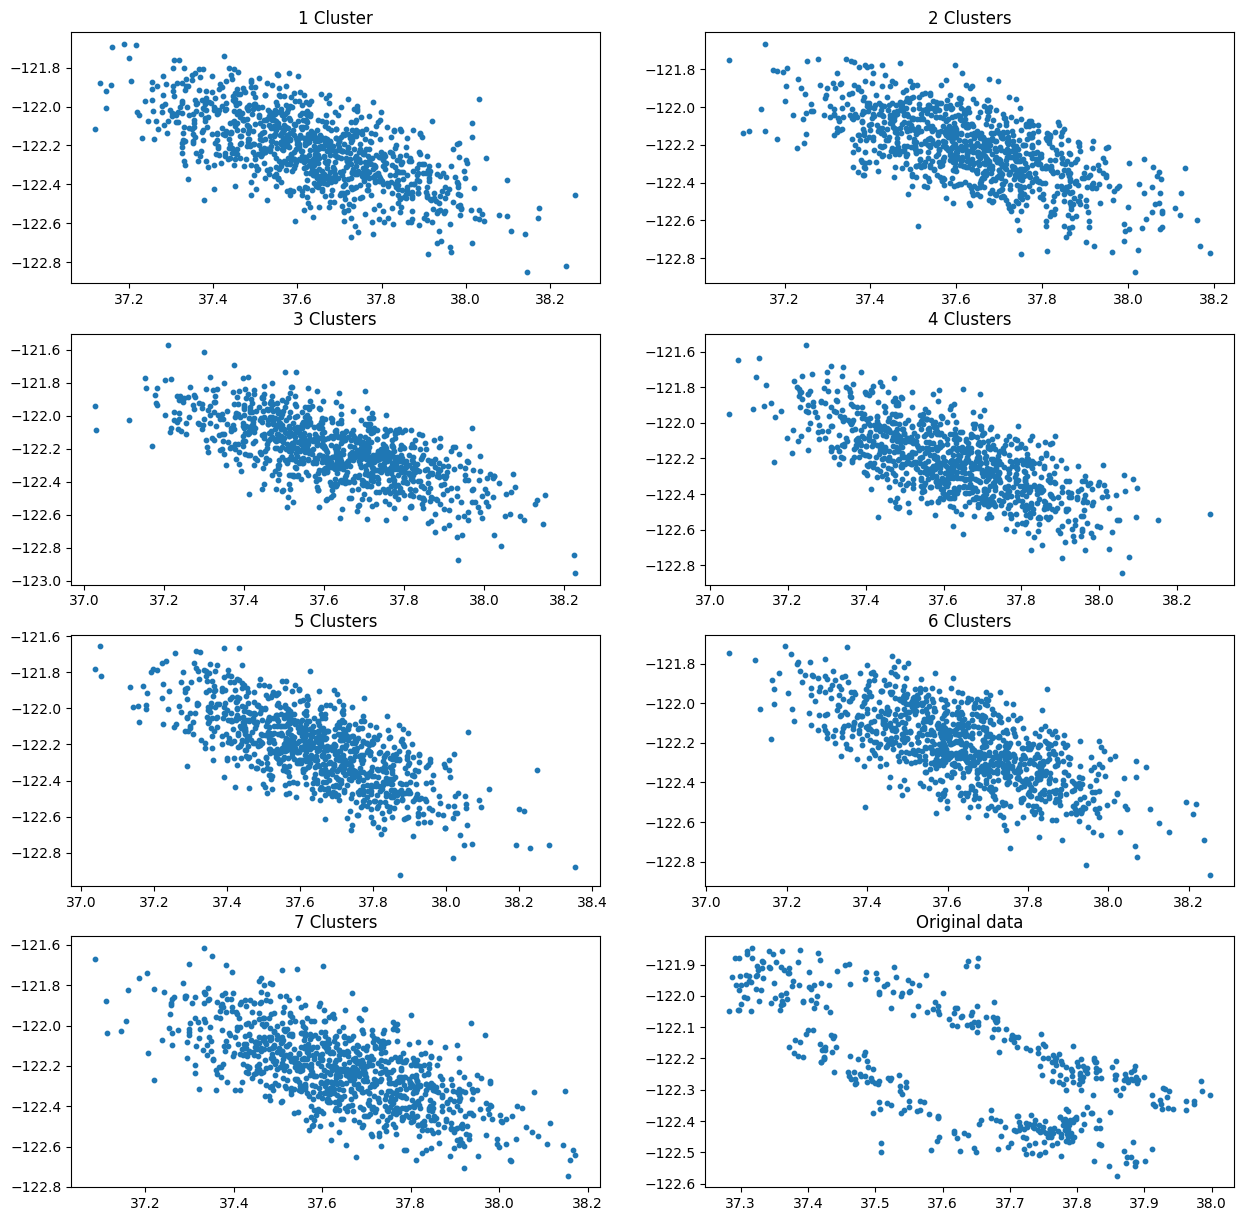

In [8]:
plt.figure(figsize=(15, 15))
plt.subplot(421)
size=1000
s=gmm_samples(size, gmms[0][1], gmms[0][2], gmms[0][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("1 Cluster")

plt.subplot(422)
s=gmm_samples(size, gmms[1][1], gmms[1][2], gmms[1][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("2 Clusters")

plt.subplot(423)
s=gmm_samples(size, gmms[3][1], gmms[3][2], gmms[3][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("3 Clusters")

plt.subplot(424)
s=gmm_samples(size, gmms[4][1], gmms[4][2], gmms[4][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("4 Clusters")

plt.subplot(425)
s=gmm_samples(size, gmms[5][1], gmms[5][2], gmms[5][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("5 Clusters")

plt.subplot(426)
s=gmm_samples(size, gmms[6][1], gmms[6][2], gmms[6][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("6 Clusters")

plt.subplot(427)
s=gmm_samples(size, gmms[7][1], gmms[7][2], gmms[7][3])
x=[]
y=[]
for i in range(len(s)):
    x.append(s[i][0])
    y.append(s[i][1])
plt.scatter(x,y, s = 10)
plt.title("7 Clusters")

plt.subplot(428)
plt.scatter(df['lat'], df['lng'], s = 10)
plt.title("Original data")

**Part B**: 


Which plot or plots look closest to the original data?  Depending on your interpretations of the elbow plot versus the simulated data, you may have decided that we wanted a different value of $k$ for the best model to *simulate* from rather than the best model to *cluster* or classify upon.  Do you think that this is normally the case?  Why or why not?  What properties of a data set would make one task easier or harder with more or less $k$?

All of the plots have similar shape to the original model but they don't have the hole in the middle. I thought that with more clusters the hole would be properly created bu there was no luck. If I had to pick one that looks closest to the model it would be $k=3$ or $k=7$ which matches the values from the mean distance graph. 

Normally I would assume that values of $k$ would align from simulation and clustering but shapes of the graph could make this not this case. In this case, a value of $k$ could be better for clustering but in simulation fail to account for the oval like shape of the data.